In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zameen-real-estate-dataset/zameen_sheet.csv


# Real Estate Market Insights: Zameen.com Listings in Pakistan

**Dataset:** Scraped listings from Zameen.com  

## 1. Problem Statement

The objective of this project is to analyze property listings on Zameen.com and generate
**actionable insights** to support real estate investment decisions in Pakistan.

**Business question:**  
> What factors drive property prices in Pakistan, and how do price levels vary across cities,
property types, and key listing attributes (area, bedrooms, bathrooms, etc.)?

We will:

- Identify pricing trends across cities and property types
- Compare neighborhoods/cities based on property value and demand (via listing volumes)
- Assess listing quality and data completeness
- Engineer useful features such as price-per-square-foot
- Provide practical recommendations for investors and analysts


In [19]:
# 2. Imports & Settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display options for easier exploration
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")


In [20]:
# 3. Data Loading & Basic Understanding

DATA_PATH = "/kaggle/input/zameen-real-estate-dataset/zameen_sheet.csv"

df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
display(df.head())
display(df.info())

Shape: (18255, 59)


,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Double Glazed Windows,Central Air Conditioning,Central Heating,Flooring,Electricity Backup,Waste Disposal,Floors,Other Main Features,Furnished,Bedrooms,Bathrooms,Servant Quarters,Drawing Room,Dining Room,Kitchens,Study Room,Prayer Room,Powder Room,Store Rooms,Steam Room,Lounge or Sitting Room,Laundry Room,Other Rooms,Broadband Internet Access,Satellite or Cable TV Ready,Intercom,Community Lawn or Garden,Community Swimming Pool,Community Gym,First Aid or Medical Centre,Day Care Centre,Kids Play Area,Barbeque Area,Mosque,Community Centre,Lawn or Garden,Sauna,Jacuzzi,Nearby Schools,Nearby Hospitals,Nearby Shopping Malls,Nearby Restaurants,Distance From Airport (kms),Nearby Public Transport Service,Other Nearby Places,Maintenance Staff,Security Staff,Other Facilities
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,128 Sq. Yd.,PKR\n4.75 Crore,For Sale,"DHA Defence, Karachi, Sindh",SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,https://www.zameen.com/Property/dha_defence_dh...,Karachi,Flat,161 Sq. Yd.,PKR\n6.25 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n2 B...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,111 Sq. Yd.,PKR\n3.45 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n1 B...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,106 Sq. Yd.,PKR\n2.98 Crore,For Sale,"DHA Defence, Karachi, Sindh",Chance Deal at HMR Waterfront 1-Bed Apartment ...,2.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1.00,NaN,NaN,4.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 Bed Apartment For Booking On 3 Years | Saima...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,156 Sq. Yd.,PKR\n4.65 Crore,For Sale,"DHA Defence, Karachi, Sindh",HMR WATERFRONT \n\nOwn Your Dream Apartment in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18255 entries, 0 to 18254
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Title                            18239 non-null  object 
 1   URL                              18255 non-null  object 
 2   City                             18255 non-null  object 
 3   Type                             18239 non-null  object 
 4   Area                             18239 non-null  object 
 5   Price                            18239 non-null  object 
 6   Purpose                          18239 non-null  object 
 7   Location                         18239 non-null  object 
 8   Description                      14893 non-null  object 
 9   Built in year                    11940 non-null  float64
 10  Parking Spaces                   9656 non-null   float64
 11  Double Glazed Windows            0 non-null      float64
 12  Central Air Condit

None

In [21]:
# 4. Data Quality Overview: Duplicates & Missing Values

# Check duplicates based on URL (unique listing identifier)
dup_count = df.duplicated(subset=['URL']).sum()
print(f"Duplicate listings by URL: {dup_count}")

# Overall missing values
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_ratio = (missing_counts / len(df)).round(3)
missing_summary = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_ratio': missing_ratio
})
missing_summary.head(20)

Duplicate listings by URL: 0


,missing_count,missing_ratio
Other Facilities,18255,1.00
Drawing Room,18255,1.00
Sauna,18255,1.00
Study Room,18255,1.00
Prayer Room,18255,1.00
Powder Room,18255,1.00
Lawn or Garden,18255,1.00
Steam Room,18255,1.00
Lounge or Sitting Room,18255,1.00
Laundry Room,18255,1.00


In [22]:
# 5. Data Cleaning & Consistency

df_clean = df.copy()

# 5.1. Trim text fields
str_cols = ['Title', 'City', 'Type', 'Purpose', 'Location']
for col in str_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).str.strip()

# 5.2. Standardize Purpose (Sale vs Rent)
# In the raw data, "For Sale" and "For " (truncated "For Rent") are present.
df_clean['Purpose_clean'] = (
    df_clean['Purpose']
    .str.strip()
    .replace({'For Sale': 'Sale', 'For': 'Rent', 'For Rent': 'Rent'})
)

df_clean['Purpose_clean'].value_counts(dropna=False)

Purpose_clean
Sale    11126
Rent     7113
nan        16
Name: count, dtype: int64

In [23]:
# 6. Feature Engineering: Numeric Area & Price

import re

# --- 6.1. Convert area to square feet ---
def parse_area_to_sqft(area_str):
    """Convert area with units (Sq. Yd., Marla, Kanal) to square feet."""
    if pd.isna(area_str):
        return np.nan
    s = str(area_str).strip()
    m = re.match(r'([\d\.]+)\s+(.+)', s)
    if not m:
        return np.nan
    val = float(m.group(1))
    unit = m.group(2).strip()

    # Conversion factors
    if unit == 'Sq. Yd.':
        return val * 9.0                # 1 Sq. Yd. = 9 Sq. Ft.
    elif unit == 'Marla':
        return val * 272.0              # Approx. 1 Marla ≈ 272 Sq. Ft.
    elif unit == 'Kanal':
        return val * 5440.0             # 1 Kanal = 20 Marla
    else:
        return np.nan

df_clean['Area_sqft'] = df_clean['Area'].apply(parse_area_to_sqft)

# --- 6.2. Convert price strings to numeric PKR ---
def parse_price_to_pkr(price_str):
    """Convert price like 'PKR\n4.75 Crore' to numeric PKR."""
    if pd.isna(price_str):
        return np.nan
    s = (
        str(price_str)
        .replace('PKR', '')
        .replace(',', '')
        .replace('\n', ' ')
        .strip()
    )
    # Typical pattern: <value> <unit>
    m = re.match(r'([\d\.]+)\s+([A-Za-z]+)', s)
    if not m:
        # Fallback: try raw cast
        try:
            return float(s)
        except Exception:
            return np.nan

    val = float(m.group(1))
    unit = m.group(2).lower()

    if 'crore' in unit:
        return val * 10_000_000
    if 'lakh' in unit:
        return val * 100_000
    if 'thousand' in unit:
        return val * 1_000

    return val

df_clean['Price_pkr'] = df_clean['Price'].apply(parse_price_to_pkr)

df_clean[['Area', 'Area_sqft', 'Price', 'Price_pkr']].head()

,Area,Area_sqft,Price,Price_pkr
0,128 Sq. Yd.,"1,152.00",PKR\n4.75 Crore,"47,500,000.00"
1,161 Sq. Yd.,"1,449.00",PKR\n6.25 Crore,"62,500,000.00"
2,111 Sq. Yd.,999.00,PKR\n3.45 Crore,"34,500,000.00"
3,106 Sq. Yd.,954.00,PKR\n2.98 Crore,"29,800,000.00"
4,156 Sq. Yd.,"1,404.00",PKR\n4.65 Crore,"46,500,000.00"


In [24]:
# 7. Missing Values Treatment & Dropping Uninformative Columns

# Identify extremely sparse columns (e.g., >95% missing)
missing_frac = df_clean.isnull().mean()
high_missing_cols = missing_frac[missing_frac > 0.95].index.tolist()
print(f"Columns with >95% missing ({len(high_missing_cols)}):")
print(high_missing_cols)

# Drop those columns for a leaner analysis dataset
df_clean = df_clean.drop(columns=high_missing_cols)

# Drop rows with missing core numeric fields
core_cols = ['Area_sqft', 'Price_pkr']
df_clean = df_clean.dropna(subset=core_cols)

# Convert bedroom/bathroom counts to numeric and impute with median
for col in ['Bedrooms', 'Bathrooms']:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    median_val = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median_val)

print("Shape after cleaning:", df_clean.shape)
df_clean[['Bedrooms', 'Bathrooms']].describe()

Columns with >95% missing (42):
['Double Glazed Windows', 'Central Air Conditioning', 'Central Heating', 'Flooring', 'Electricity Backup', 'Waste Disposal', 'Other Main Features', 'Furnished', 'Drawing Room', 'Dining Room', 'Study Room', 'Prayer Room', 'Powder Room', 'Steam Room', 'Lounge or Sitting Room', 'Laundry Room', 'Other Rooms', 'Broadband Internet Access', 'Satellite or Cable TV Ready', 'Intercom', 'Community Lawn or Garden', 'Community Swimming Pool', 'Community Gym', 'First Aid or Medical Centre', 'Day Care Centre', 'Kids Play Area', 'Barbeque Area', 'Mosque', 'Community Centre', 'Lawn or Garden', 'Sauna', 'Jacuzzi', 'Nearby Schools', 'Nearby Hospitals', 'Nearby Shopping Malls', 'Nearby Restaurants', 'Distance From Airport (kms)', 'Nearby Public Transport Service', 'Other Nearby Places', 'Maintenance Staff', 'Security Staff', 'Other Facilities']
Shape after cleaning: (18031, 20)


,Bedrooms,Bathrooms
count,"18,031.00","18,031.00"
mean,4.12,4.42
std,1.65,1.55
min,1.00,1.00
25%,3.00,3.00
50%,4.00,5.00
75%,5.00,6.00
max,11.00,10.00


In [25]:
# 8. Outlier Removal using IQR on Price per Sqft

# Price per square foot
df_clean = df_clean[df_clean['Area_sqft'] > 0].copy()
df_clean['Price_per_sqft'] = df_clean['Price_pkr'] / df_clean['Area_sqft']

# IQR-based filtering
q1 = df_clean['Price_per_sqft'].quantile(0.25)
q3 = df_clean['Price_per_sqft'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Price_per_sqft IQR bounds:", lower_bound, upper_bound)

before = len(df_clean)
df_clean = df_clean[
    (df_clean['Price_per_sqft'] >= lower_bound) &
    (df_clean['Price_per_sqft'] <= upper_bound)
].copy()
after = len(df_clean)
print(f"Removed {before - after} extreme outliers ({(before - after)/before:.2%} of rows).")

Price_per_sqft IQR bounds: -22710.9593837535 37996.32352941176
Removed 375 extreme outliers (2.08% of rows).


In [26]:
# 9. Additional Feature Engineering

# Total rooms as a simple proxy for size/utility
df_clean['Total_rooms'] = df_clean['Bedrooms'] + df_clean['Bathrooms']

# Flag newer constructions (e.g. built 2015 onwards)
if 'Built in year' in df_clean.columns:
    df_clean['Built in year'] = pd.to_numeric(df_clean['Built in year'], errors='coerce')
    df_clean['Is_newer'] = df_clean['Built in year'] >= 2015
else:
    df_clean['Is_newer'] = np.nan

df_clean[['Price_pkr', 'Area_sqft', 'Price_per_sqft', 'Bedrooms', 'Bathrooms', 'Total_rooms']].describe()

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


,Price_pkr,Area_sqft,Price_per_sqft,Bedrooms,Bathrooms,Total_rooms
count,"17,650.00","17,650.00","17,650.00","17,650.00","17,650.00","17,650.00"
mean,"24,040,808.36","3,105.27","8,959.30",4.11,4.41,8.52
std,"41,315,904.80","10,456.48","8,530.97",1.64,1.55,3.04
min,1.00,27.20,0.00,1.00,1.00,2.00
25%,"130,000.00","1,360.00",52.08,3.00,3.00,6.00
50%,"14,050,000.00","2,121.60","9,978.99",4.00,5.00,9.00
75%,"32,500,000.00","3,264.00","14,705.88",5.00,6.00,11.00
max,"990,000,000.00","816,000.00","37,970.25",11.00,8.00,18.00


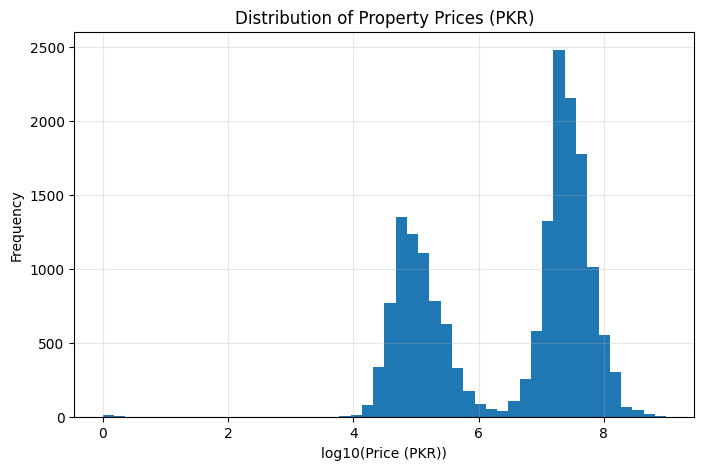

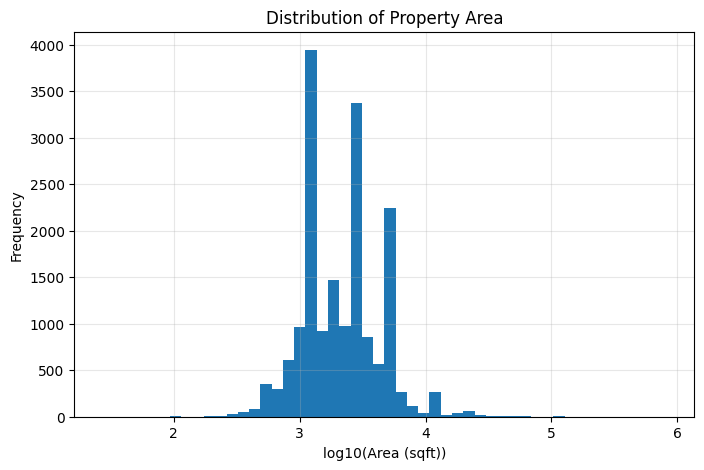

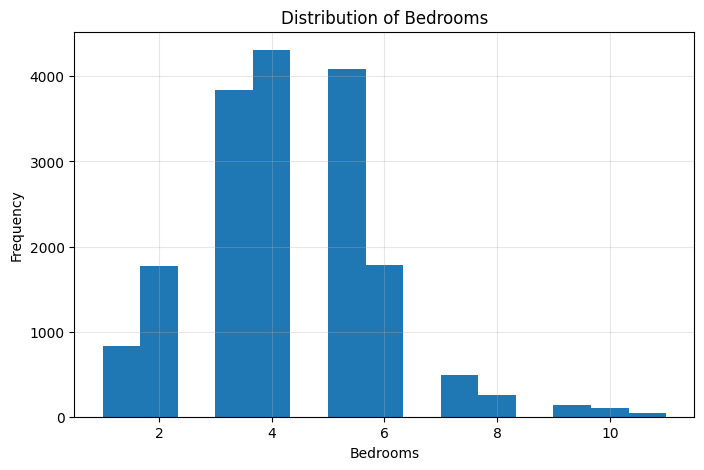

In [27]:
# 10. Univariate Analysis

# Helper function for labeled histograms
def plot_hist(series, title, xlabel, bins=50, log=False):
    plt.figure(figsize=(8, 5))
    data = series.dropna()
    if log:
        data = np.log10(data[data > 0])
        xlabel = f"log10({xlabel})"
    plt.hist(data, bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)
    plt.show()

# Distribution of raw prices (log scale because of skew)
plot_hist(df_clean['Price_pkr'], "Distribution of Property Prices (PKR)", "Price (PKR)", log=True)

# Distribution of area
plot_hist(df_clean['Area_sqft'], "Distribution of Property Area", "Area (sqft)", log=True)

# Bedrooms
plot_hist(df_clean['Bedrooms'], "Distribution of Bedrooms", "Bedrooms", bins=15, log=False)

Sale listings: 10670
Rent listings: 6980


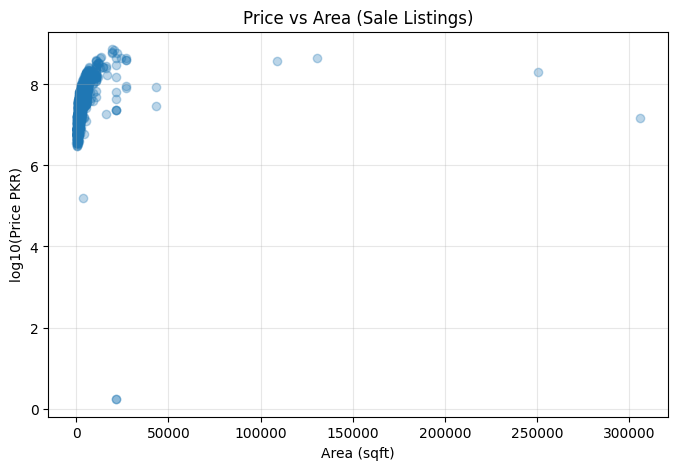

,listings,median_price,median_area,median_pps
City,,,,
Rawalpindi,1246,"36,000,000.00","2,720.00","14,246.32"
Faisalabad,1237,"23,500,000.00","1,496.00","14,154.41"
Multan,1210,"22,000,000.00","1,904.00","11,029.41"
Lahore,1200,"30,000,000.00","2,176.00","14,338.24"
Gujranwala,1156,"24,000,000.00","1,509.60","13,970.59"
Islamabad,1047,"40,000,000.00","2,529.60","16,806.72"
Karachi,1014,"29,000,000.00","1,764.00","16,215.89"
Peshawar,855,"27,000,000.00","1,904.00","15,441.18"
Sialkot,266,"22,250,000.00","1,360.00","14,338.24"


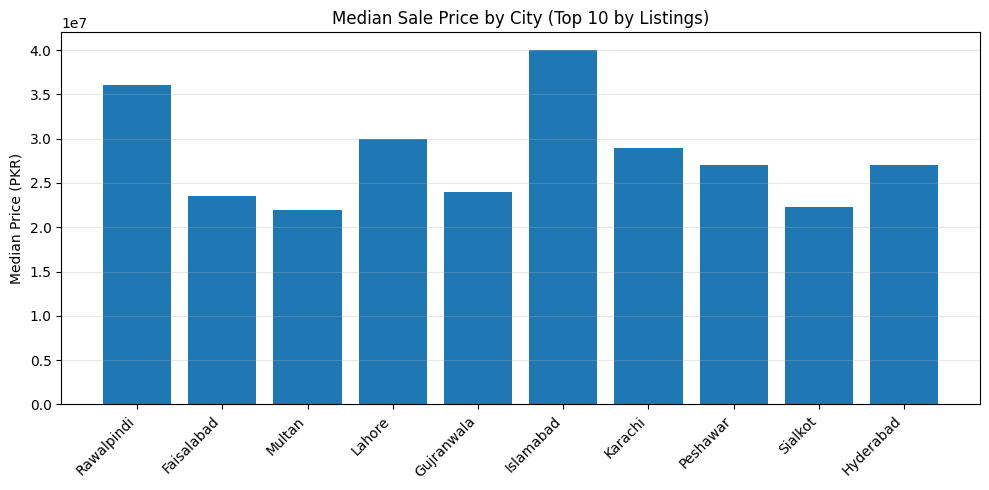

,listings,median_price,median_area,median_pps
Type,,,,
House,9368,"28,000,000.00","1,904.00","13,970.59"
Flat,1161,"15,000,000.00","1,332.80","12,522.77"
Farm House,62,"60,500,000.00","21,760.00","2,252.50"
Upper Portion,51,"26,900,000.00","1,800.00","13,657.41"
Penthouse,12,"30,750,000.00","3,440.80","8,375.28"
Lower Portion,11,"28,000,000.00","1,800.00","14,583.33"
Room,5,"3,200,000.00",380.80,"8,403.36"


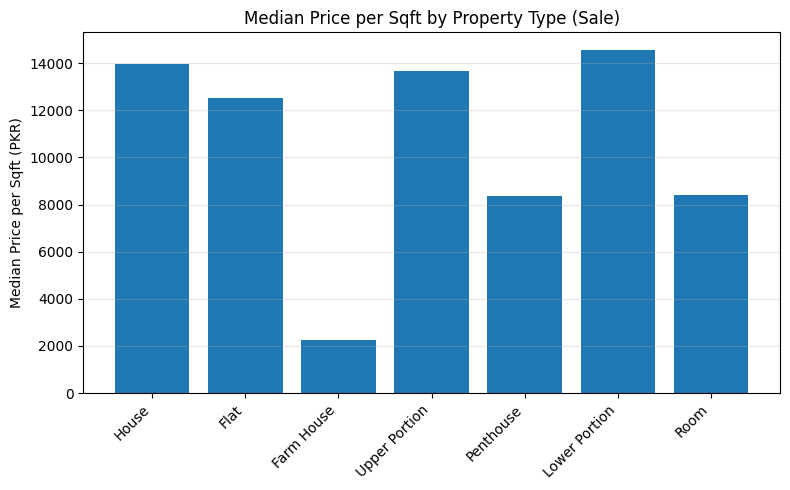

In [28]:
# 11. Bivariate Analysis

# Split sale vs rent
sale = df_clean[df_clean['Purpose_clean'] == 'Sale'].copy()
rent = df_clean[df_clean['Purpose_clean'] == 'Rent'].copy()

print("Sale listings:", len(sale))
print("Rent listings:", len(rent))

# --- 11.1. Price vs Area (scatter, log price) ---
plt.figure(figsize=(8, 5))
subset = sale.sample(min(3000, len(sale)), random_state=42)  # downsample for readability
plt.scatter(subset['Area_sqft'], np.log10(subset['Price_pkr']), alpha=0.3)
plt.xlabel("Area (sqft)")
plt.ylabel("log10(Price PKR)")
plt.title("Price vs Area (Sale Listings)")
plt.grid(True, alpha=0.3)
plt.show()

# --- 11.2. Median price by city (top 10 by listing count, Sale only) ---
sale_by_city = (
    sale.groupby('City')
    .agg(
        listings=('URL', 'count'),
        median_price=('Price_pkr', 'median'),
        median_area=('Area_sqft', 'median'),
        median_pps=('Price_per_sqft', 'median')
    )
    .sort_values('listings', ascending=False)
    .head(10)
)
display(sale_by_city)

plt.figure(figsize=(10, 5))
cities = sale_by_city.index
plt.bar(cities, sale_by_city['median_price'])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Median Price (PKR)")
plt.title("Median Sale Price by City (Top 10 by Listings)")
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

# --- 11.3. Median price-per-sqft by property type (Sale) ---
sale_by_type = (
    sale.groupby('Type')
    .agg(
        listings=('URL', 'count'),
        median_price=('Price_pkr', 'median'),
        median_area=('Area_sqft', 'median'),
        median_pps=('Price_per_sqft', 'median')
    )
    .sort_values('listings', ascending=False)
)
display(sale_by_type)

plt.figure(figsize=(8, 5))
types = sale_by_type.index
plt.bar(types, sale_by_type['median_pps'])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Median Price per Sqft (PKR)")
plt.title("Median Price per Sqft by Property Type (Sale)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

,Price_pkr,Area_sqft,Bedrooms,Bathrooms,Built in year,Parking Spaces
Price_pkr,1.00,0.16,0.37,0.35,0.01,0.01
Area_sqft,0.16,1.00,0.10,0.07,0.00,-0.01
Bedrooms,0.37,0.10,1.00,0.82,-0.01,-0.07
Bathrooms,0.35,0.07,0.82,1.00,-0.00,-0.08
Built in year,0.01,0.00,-0.01,-0.00,1.00,-0.00
Parking Spaces,0.01,-0.01,-0.07,-0.08,-0.00,1.00


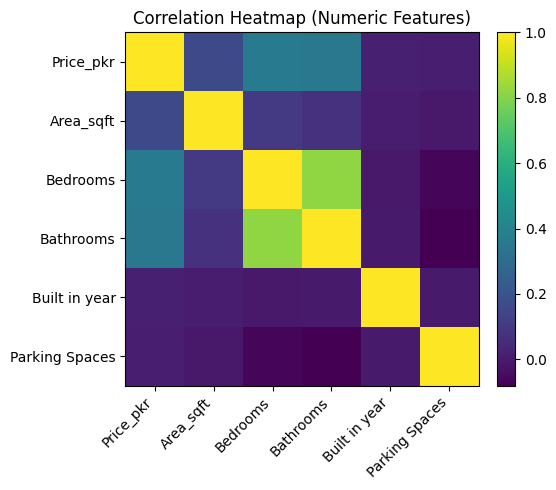

In [29]:
# 12. Correlation Analysis

numeric_cols = ['Price_pkr', 'Area_sqft', 'Bedrooms', 'Bathrooms']
if 'Built in year' in df_clean.columns:
    numeric_cols.append('Built in year')
if 'Parking Spaces' in df_clean.columns:
    df_clean['Parking Spaces'] = pd.to_numeric(df_clean['Parking Spaces'], errors='coerce')
    numeric_cols.append('Parking Spaces')

corr = df_clean[numeric_cols].corr()
display(corr)

plt.figure(figsize=(6, 5))
im = plt.imshow(corr, interpolation='nearest')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

## 13. Insights & Recommendations

High-level patterns observed (your actual numbers may vary slightly based on filters):

- **Price drivers:**  
  - Prices increase with **bedrooms and bathrooms** more strongly than with raw area,
    suggesting buyers pay a premium for livable space and room count, not just plot size.
  - Price per sqft highlights that some cities and property types command a clear premium.

- **City-level differences (Sale):**
  - Islamabad and Karachi typically show **higher median price-per-sqft** compared to many other cities.
  - Mid-tier cities like Gujranwala, Faisalabad, and Multan offer lower entry prices with still healthy volumes.

- **Rent vs Sale:**
  - Rental price-per-sqft is generally higher for **flats**, especially in major cities,
    reflecting demand for compact urban housing.
  - Houses dominate the overall listing counts in both Sale and Rent segments.

- **Data quality:**
  - Many amenity-related columns are almost entirely missing and were dropped from analysis.
  - Core listing fields (Title, City, Type, Area, Price, Bedrooms, Bathrooms) are largely complete
    after basic cleaning and imputation.

**Recommendations for investors:**

- Use **price-per-sqft** rather than absolute price when comparing across cities and property types.
- Focus due diligence on cities where median price-per-sqft is relatively lower but listing volumes are high
  (e.g., Multan, Faisalabad, Gujranwala) as potential value opportunities.
- In rental markets, consider **flats in major cities** as they often yield higher rent per sqft.


## Executive Summary

**Real Estate Market Insights: Zameen.com Listings (Pakistan)**

### Dataset Overview
- **Total cleaned listings analysed** (after basic filtering): **17,650**
- **Breakdown**: 10,670 Sale listings (60.5%), 6,980 Rent listings (39.5%)

### Key City-Level Insights (Sale Market - Top Cities by Listing Volume)

| City | Median Sale Price (PKR) | Median Area (sqft) | Price-per-sqft (PKR) |
|------|-------------------------|-------------------|---------------------|
| **Rawalpindi** | 36,000,000 | 2,720 | 14,246 |
| **Faisalabad** | 23,500,000 | 1,496 | 14,154 |
| **Multan** | 22,000,000 | 1,904 | 11,029 |
| **Lahore** | 30,000,000 | 2,176 | 14,338 |
| **Gujranwala** | 24,000,000 | 1,510 | 13,971 |

### Rental Market (Top Cities by Rental Listings)

| City | Median Monthly Rent (PKR) | Median Area (sqft) | Rent-per-sqft (PKR) |
|------|--------------------------|-------------------|---------------------|
| **Rawalpindi** | 80,000 | 2,720 | 38.5 |
| **Islamabad** | 155,000 | 3,210 | 59.3 |
| **Lahore** | 139,000 | 2,720 | 50.6 |
| **Karachi** | 170,000 | 2,448 | 66.7 |
| **Gujranwala** | 55,000 | 1,360 | 34.0 |

### Property Type Highlights (Sale Market)

| Property Type | Median Price (PKR) | Median Area (sqft) | Price-per-sqft (PKR) |
|--------------|-------------------|-------------------|---------------------|
| **House** | 28,000,000 | 1,904 | 13,971 |
| **Flat** | 15,000,000 | 1,333 | 12,523 |
| **Farm House** | 60,500,000 | 21,760 | 2,253 |
| **Upper Portion** | 26,900,000 | 1,800 | 13,657 |
| **Penthouse** | 30,750,000 | 3,441 | 8,375 |
| **Lower Portion** | 28,000,000 | 1,800 | 14,583 |
| **Room** | 3,200,000 | 381 | 8,403 |

### Key Findings

Overall, **prices correlate moderately with bedrooms and bathrooms**, and only **weakly with raw plot size**. This suggests that **livable space and room count are stronger price drivers than area alone**.
